In [58]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [23]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))

In [7]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [3]:
verbs_adverbs = pickle.load(open("pickle_files/verbs_adverbs.pkl", "rb" ))

In [36]:
simple_text = pickle.load(open("pickle_files/simple_text.pkl", "rb" ))

In [47]:
not_happening = pickle.load(open("pickle_files/not_happening.pkl", "rb" ))

In [2]:
how_can_this_happen = pickle.load(open("pickle_files/how_can_this_happen.pkl", "rb" ))

In [3]:
def count_letters(words):
    length = []
    for x in words:
        length.append(len(x))
    return sum(length)

In [4]:
count_letters(how_can_this_happen)

5885069

In [19]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_fit_tran = count_vectorizer2.fit_transform(corpus)

NameError: name 'corpus' is not defined

In [5]:
tfidf = TfidfVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cor_tfidf = tfidf.fit_transform(how_can_this_happen)

In [9]:
lsa = TruncatedSVD(120, algorithm = 'arpack')
corpus_lsa = lsa.fit_transform(cor_tfidf)
corpus_lsa = Normalizer(copy=False).fit_transform(corpus_lsa)

In [10]:
sum(lsa.explained_variance_ratio_)

0.09094852518790479

In [11]:
terms = tfidf.get_feature_names()

In [12]:
for i, comp in enumerate(lsa.components_):
    Terms_in_Comp = zip(terms,comp)
    sorted_Terms = sorted(Terms_in_Comp, key = lambda x: x[1], reverse=True) [:10]
    print("Topic %d:" %i)
    for term in sorted_Terms:
        print(term[0])
    print(" ")

Topic 0:
2018
hous
atblog
polit
say
north
republican
polici
wa
foreign
 
Topic 1:
busi
live
economi global
2018 right reserved
2018 right reserved delay
archaeolog
archaeolog wild
archaeolog wild natur
archaeolog wild natur innov
busi outdoor
 
Topic 2:
free
wa
like
autom
apocalyps
autom apocalyps
templat
script
depend
add
 


KeyboardInterrupt: 

In [20]:
import os

os.system('say "Your move.....Commander"')

0

In [14]:
SSEs = []
Sil_coefs = []
for k in range(2,121):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(corpus_lsa)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(corpus_lsa, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

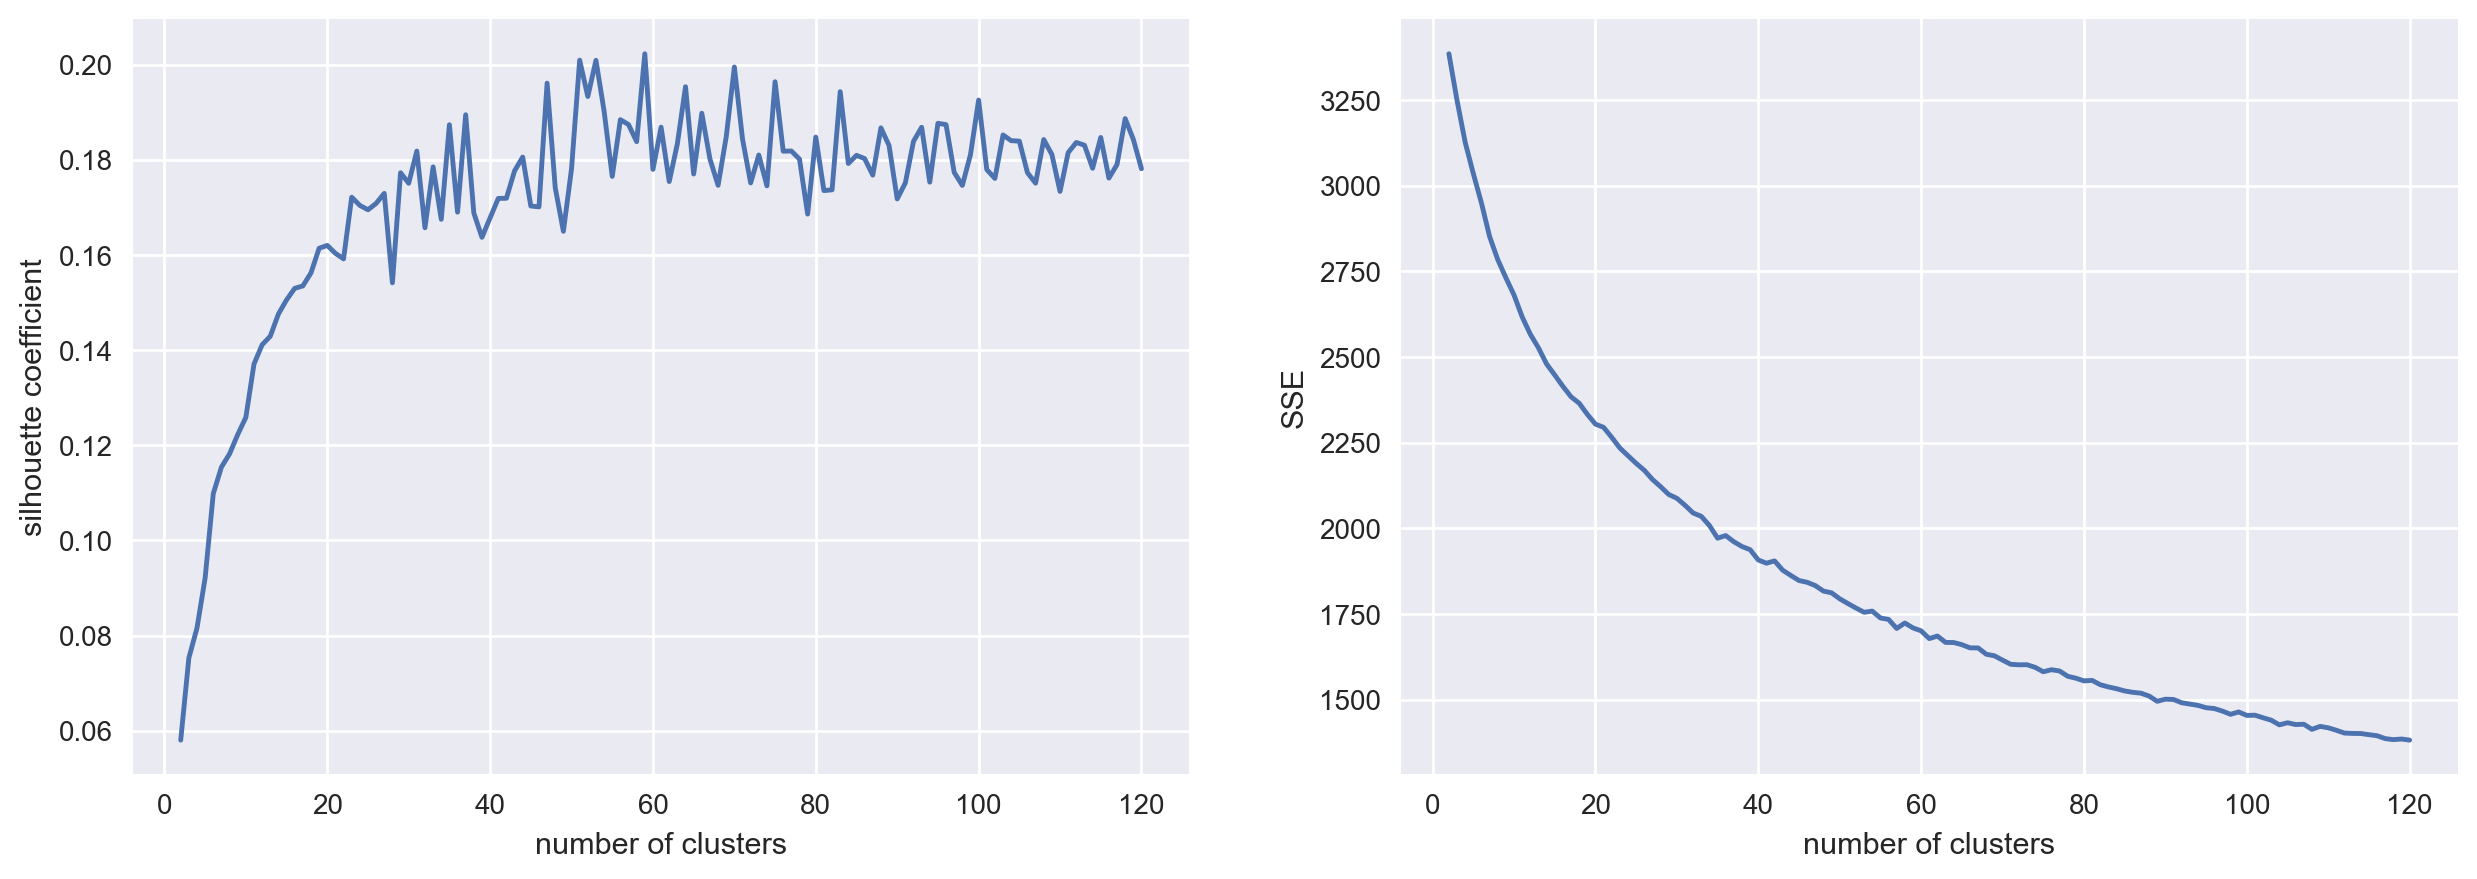

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,121)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [16]:
import os

os.system('say "Job\'s done"')

0

In [17]:
km = KMeans(n_clusters=59)
clusts = km.fit_predict(corpus_lsa)

In [18]:
len(clusts)

4092

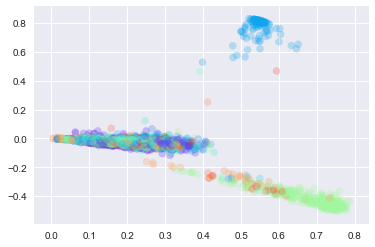

In [19]:
plt.scatter(corpus_lsa[:, 0], corpus_lsa[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)


In [20]:
from sklearn.manifold import TSNE
#Fits t-SNE for visualization
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(corpus_lsa)

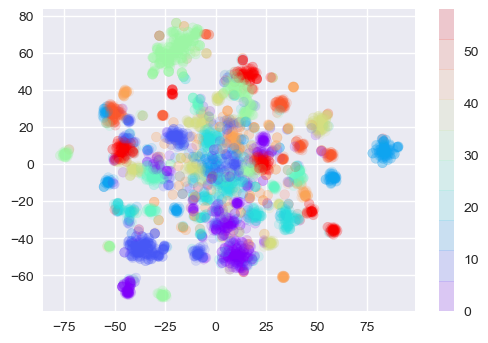

In [21]:
#Graphs t-SNE
plt.figure(dpi=100)

cmap = plt.cm.get_cmap('rainbow', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:,1], c=clusts, cmap=cmap, alpha = 0.15)
#plt.xlim(-20,30)
#plt.ylim(-30,-10)
plt.colorbar()
plt.clim()

In [24]:
true_df['clusters'] = clusts

In [25]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [26]:
true_df.clusters.value_counts()

33    323
10    196
3     180
45    162
22    124
15    119
13    118
8     113
18    111
56    107
29    106
42     96
9      96
35     92
54     91
0      89
20     88
24     87
53     81
47     78
2      70
40     69
4      68
21     67
37     67
1      67
34     64
11     61
5      60
26     58
19     58
23     57
32     57
51     56
30     51
16     51
38     47
31     39
58     37
27     37
7      35
25     34
41     34
36     34
14     34
12     34
48     33
49     32
52     28
55     27
46     26
17     24
39     23
28     22
44     21
57     21
43     15
50     10
6       7
Name: clusters, dtype: int64

In [32]:
for x in range(50):
    largest = true_df['clusters'] == x
    clust_x_df = true_df[largest]
    print("Cluster {}\n".format(x), clust_x_df.source.value_counts())

Cluster 0
 Info wars          35
Mother Jones       22
Huffington Post    16
National Review     6
Breitbart           6
Daily Beast         2
Reuters             2
Name: source, dtype: int64
Cluster 1
 Reuters            26
Huffington Post     8
Info wars           8
Breitbart           8
Daily Beast         6
Mother Jones        6
National Review     5
Name: source, dtype: int64
Cluster 2
 Huffington Post    22
Info wars          17
Mother Jones       11
Breitbart          10
Reuters             5
Associate Press     4
Activist Post       1
Name: source, dtype: int64
Cluster 3
 Info wars    180
Name: source, dtype: int64
Cluster 4
 Global Research    31
National Review    15
Breitbart           7
Huffington Post     5
Activist Post       4
Mother Jones        3
Info wars           2
Daily Beast         1
Name: source, dtype: int64
Cluster 5
 Activist Post    60
Name: source, dtype: int64
Cluster 6
 Huffington Post    4
Mother Jones       2
Breitbart          1
Name: source, dtype: in

In [28]:
reference = true_df[['source','clusters']].pivot_table(index='clusters', columns='source', aggfunc=len)

In [102]:
X = true_df.clusters
y = true_df.source
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [103]:
lm1 = LogisticRegression(C=1000)
lm1.fit(X_train, y_train)
print(lm1.score(X_test, y_test))
print(lm1.score(X_train, y_train))

0.09645909645909646
0.10846318362358692


In [104]:
rf2 = RandomForestClassifier(n_estimators=50, max_depth=15)
rf2.fit(X_train, y_train)
print(rf2.score(X_test, y_test))
print(rf2.score(X_train, y_train))

0.5970695970695971
0.6318362358692331


In [105]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.score(X_train, y_train))

0.590964590964591
0.6318362358692331


In [101]:
for x in range(4092):
    print(bc.predict(x))

['Info wars']
['Reuters']
['Huffington Post']
['Info wars']
['Global Research']
['Activist Post']
['Huffington Post']
['Reuters']
['Mother Jones']
['Info wars']
['Activist Post']
['Activist Post']
['Global Research']
['Fox News']
['Reuters']
['Mother Jones']
['National Review']
['Breitbart']
['Reuters']
['Activist Post']
['Mother Jones']
['Mother Jones']
['Mother Jones']
['Mother Jones']
['Global Research']
['Reuters']
['National Review']
['Activist Post']
['Huffington Post']
['Daily Beast']
['Activist Post']
['Huffington Post']
['Mother Jones']
['Alabama Today']
['Mother Jones']
['National Review']
['Mother Jones']
['Mother Jones']
['Global Research']
['Huffington Post']
['Reuters']
['National Review']
['Reuters']
['Reuters']
['Breitbart']
['Huffington Post']
['Alabama Today']
['Reuters']
['National Review']
['National Review']
['Alabama Today']
['Reuters']
['Mother Jones']
['Mother Jones']
['Daily Beast']
['Info wars']
['Reuters']
['Alabama Today']
['Info wars']
['Info wars']
['Info 

Process ForkPoolWorker-935:
Process ForkPoolWorker-934:
Process ForkPoolWorker-936:
Process ForkPoolWorker-933:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/NickThomas/Desktop/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/NickThomas/Desktop/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/NickThomas/Desktop/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/NickThomas/Desktop/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/NickThomas/Desktop/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/NickThomas/Desktop/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._

KeyboardInterrupt: 

In [106]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, n_jobs=-1)
bc.fit(X_train, y_train)
print(bc.score(X_test, y_test))
print(bc.score(X_train, y_train))

ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information

In [67]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.249
                 precision    recall  f1-score   support

  Activist Post       0.23      0.74      0.34        95
  Alabama Today       0.24      0.89      0.38        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.53      0.40      0.46       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.58      0.11      0.19        98
        Reuters       0.18      0.27      0.21       104

    avg / total       0.20      0.25      0.17       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.133
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.38      0.06      0.10       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.13      0.99      0.23       104

    avg / total       0.06      0.13      0.04       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


Accuracy: 0.122
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.00      0.00      0.00        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.12      1.00      0.22       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.01      0.12      0.03       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

model = LinearSVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))



Accuracy: 0.117
                 precision    recall  f1-score   support

  Activist Post       0.00      0.00      0.00        95
  Alabama Today       0.00      0.00      0.00        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.08      0.75      0.15        63
    Daily Beast       0.00      0.00      0.00        75
       Fox News       0.00      0.00      0.00        25
Global Research       0.00      0.00      0.00        37
Huffington Post       0.00      0.00      0.00        74
      Info wars       0.19      0.49      0.28       100
   Mother Jones       0.00      0.00      0.00        85
National Review       0.00      0.00      0.00        98
        Reuters       0.00      0.00      0.00       104

    avg / total       0.03      0.12      0.05       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
model = SVC()
model.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.596
                 precision    recall  f1-score   support

  Activist Post       0.86      0.95      0.90        95
  Alabama Today       0.90      0.92      0.91        62
Associate Press       0.00      0.00      0.00         1
      Breitbart       0.57      0.21      0.30        63
    Daily Beast       1.00      0.51      0.67        75
       Fox News       1.00      0.96      0.98        25
Global Research       0.68      0.68      0.68        37
Huffington Post       0.51      0.45      0.47        74
      Info wars       0.58      0.46      0.51       100
   Mother Jones       0.26      0.59      0.36        85
National Review       0.84      0.60      0.70        98
        Reuters       0.43      0.51      0.47       104

    avg / total       0.66      0.60      0.61       819



/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
os.system('say "Your move.....Commander"')

0

## Only nouns

In [2]:
only_nouns = pickle.load(open("pickle_files/only_nouns.pkl", "rb" ))

In [73]:
tfidf = TfidfVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   #token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
cor_tfidf = tfidf.fit_transform(only_nouns)

NameError: name 'only_nouns' is not defined

In [74]:
lsa = TruncatedSVD(80, algorithm = 'arpack')
corpus_lsa = lsa.fit_transform(cor_tfidf)
corpus_lsa = Normalizer(copy=False).fit_transform(corpus_lsa)

KeyboardInterrupt: 

In [ ]:
sum(lsa.explained_variance_ratio_)

In [6]:
terms = tfidf.get_feature_names()

In [7]:
for i, comp in enumerate(lsa.components_):
    Terms_in_Comp = zip(terms,comp)
    sorted_Terms = sorted(Terms_in_Comp, key = lambda x: x[1], reverse=True) [:10]
    print("Topic %d:" %i)
    for term in sorted_Terms:
        print(term[0])
    print(" ")

Topic 0:
share
influenc
style width
style width height
style
opinion
width height
width
height
state
 
Topic 1:
news
health
entertain
video
scienc
terror
tv
market
fnc
linkitem
 
Topic 2:
document
getelementbyid
push
callback
com
id
document getelementbyid
config
getelementsbytagname
insertbefore
 
Topic 3:
jquery
addeventlistener event
addeventlistener event jquery
addeventlistener event jquery document
css
css width
css width height
css width height auto
document ready
document ready jquery
 
Topic 4:
jquery
width height
width
height
addeventlistener event
addeventlistener event jquery
addeventlistener event jquery document
css
css width
css width height
 
Topic 5:
break case
htmladwh
function
queryselector
box
gt
break
case break
window
style
 
Topic 6:
null
pubdate
date
jwp
jwplayer
prelimdate
null null
window
review
nation review
 
Topic 7:
cell
wireless
cell phone
wifi
phone
radiat
mueller
wifi radiat
wireless wifi
phone wireless
 
Topic 8:
cell
wireless
school
cell phone
wifi
ra

In [8]:
SSEs = []
Sil_coefs = []
for k in range(2,61):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(corpus_lsa)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(corpus_lsa, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

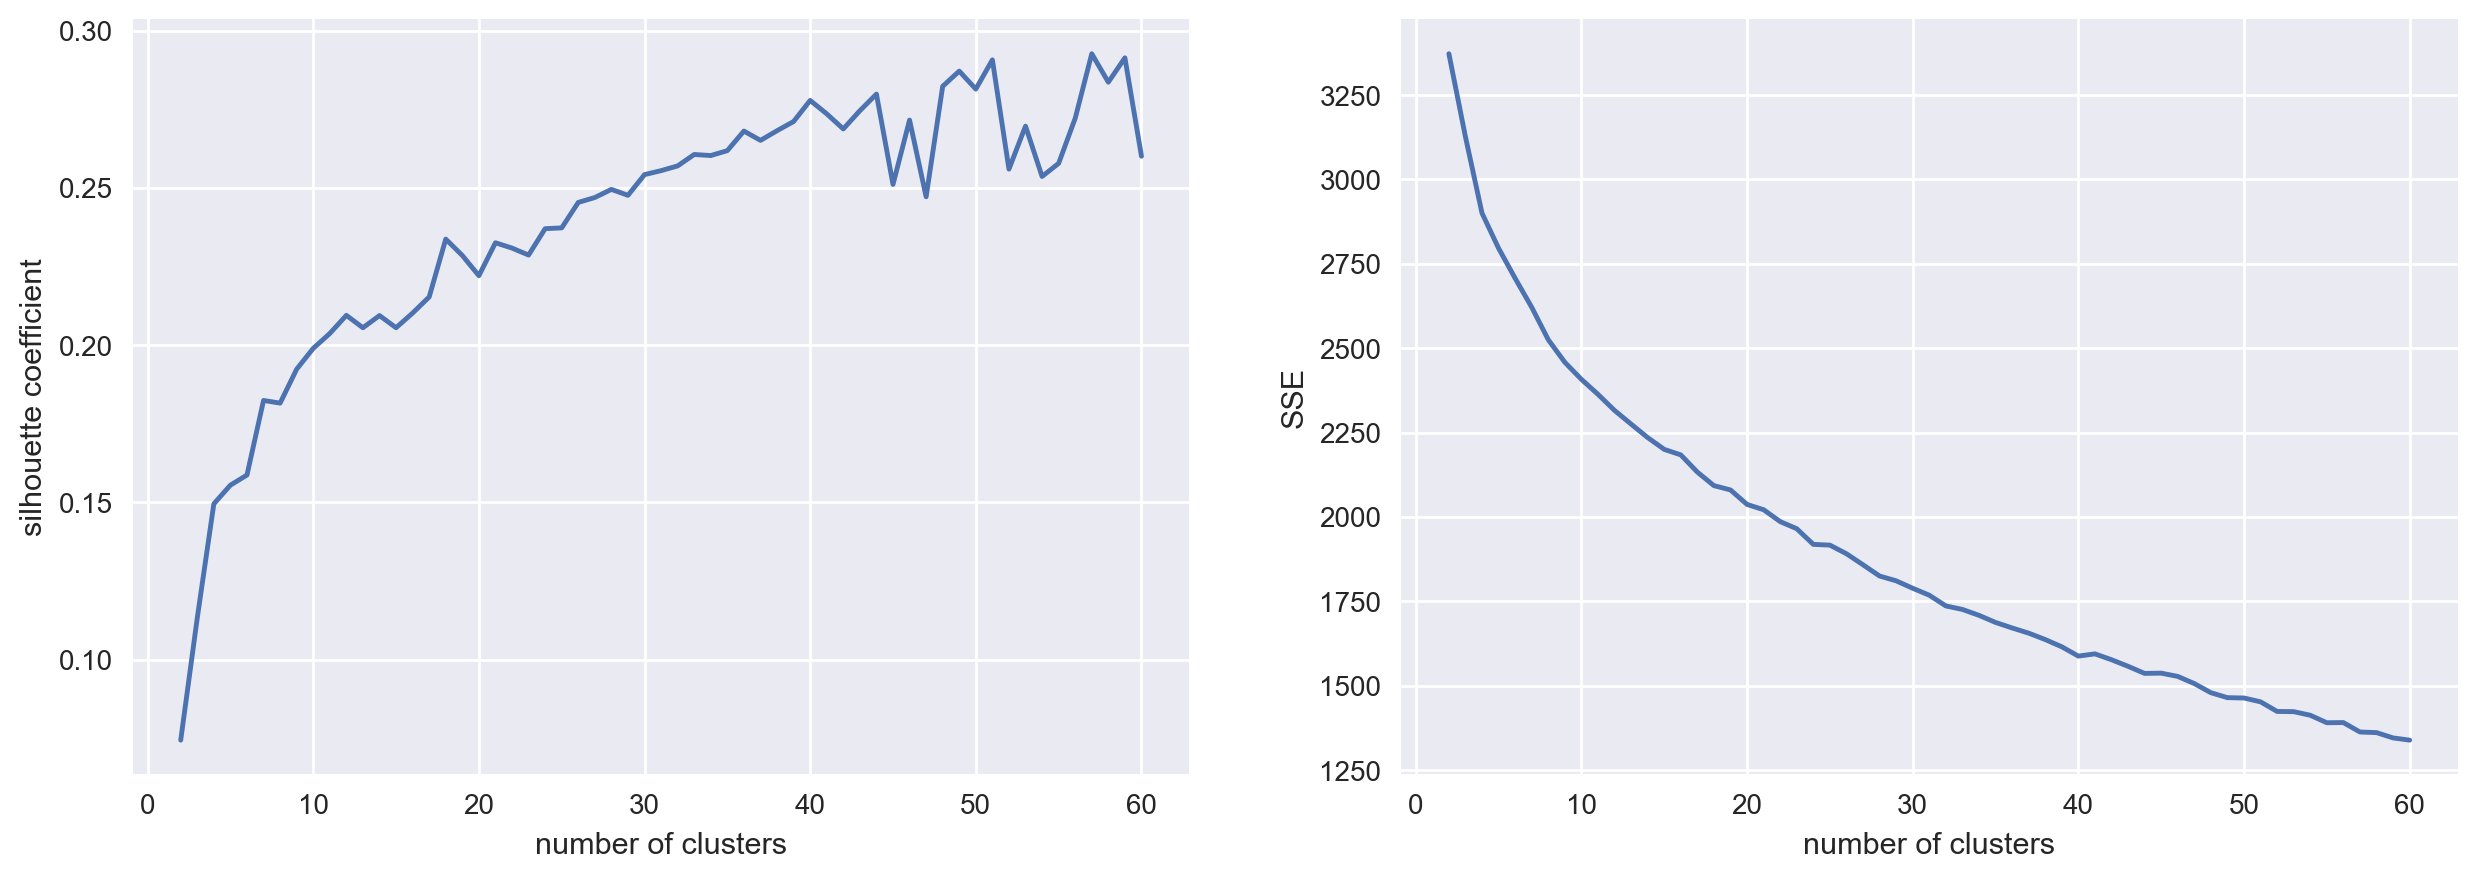

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,61)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [10]:
km = KMeans(n_clusters=58)
clusts = km.fit_predict(corpus_lsa)

In [13]:
true_df['clusters'] = clusts

In [14]:
true_df.clusters.value_counts()

18    375
29    314
56    245
6     175
35    167
16    145
9     120
12    108
30     99
21     99
23     96
11     95
55     91
2      87
14     87
10     83
22     75
51     66
53     65
48     63
7      62
44     61
24     60
45     57
33     56
1      56
3      55
13     53
39     50
54     48
15     47
20     46
19     45
36     45
43     43
28     43
42     43
26     39
40     38
32     37
25     37
31     37
27     36
52     34
34     33
17     32
46     31
37     28
4      26
47     24
41     23
50     22
38     21
8      20
0      17
57     13
49     11
5       8
Name: clusters, dtype: int64

In [15]:
for x in range(57):
    largest = true_df['clusters'] == x
    clust_x_df = true_df[largest]
    print(clust_x_df.source.value_counts())

Info wars          9
Huffington Post    4
Mother Jones       3
Daily Beast        1
Name: source, dtype: int64
Reuters            14
Mother Jones       14
Huffington Post    12
Daily Beast         6
Info wars           2
Breitbart           2
Associate Press     2
Activist Post       2
Global Research     2
Name: source, dtype: int64
Reuters    87
Name: source, dtype: int64
Activist Post    55
Name: source, dtype: int64
Reuters            12
Huffington Post     7
Daily Beast         3
Mother Jones        2
Info wars           1
Breitbart           1
Name: source, dtype: int64
Reuters            2
Huffington Post    2
Global Research    1
Info wars          1
National Review    1
Mother Jones       1
Name: source, dtype: int64
Huffington Post    50
Mother Jones       49
Breitbart          37
Info wars          18
Daily Beast        11
Reuters             5
National Review     2
Global Research     2
Associate Press     1
Name: source, dtype: int64
Mother Jones       24
Reuters          